Actual mean: 1.024205155043831
Biased mean: 2.403679100664282


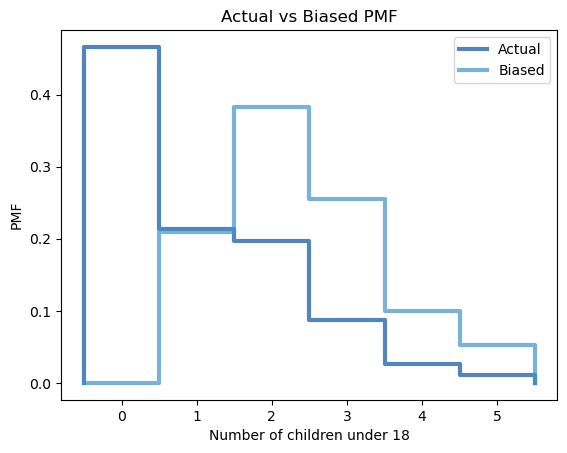

In [9]:
# Assignment 4.2
# Georgette Joseph
# 12/21/2024

import nsfg
import thinkstats2
import thinkplot

# Load the NSFG respondent data
resp = nsfg.ReadFemResp(dct_file='2002FemResp.dct', dat_file='2002FemResp.dat.gz')

# Extract the NUMKDHH variable (number of children under 18 in the household)
num_kids = resp['numkdhh'].dropna()

# Construct the actual PMF
actual_pmf = thinkstats2.Pmf(num_kids, label="Actual")

# Define a function to compute the biased PMF
def BiasChildrenPmf(pmf, label):
    biased_pmf = pmf.Copy(label=label)
    for x, p in pmf.Items():
        biased_pmf.Mult(x, x)  # Multiply probability by the number of children
    biased_pmf.Normalize()
    return biased_pmf

# Compute the biased PMF
biased_pmf = BiasChildrenPmf(actual_pmf, label="Biased")

# Plot the actual and biased PMFs
thinkplot.PrePlot(2)
thinkplot.Pmfs([actual_pmf, biased_pmf])
thinkplot.Config(xlabel="Number of children under 18", ylabel="PMF", title="Actual vs Biased PMF")

# Compute and print the means of the distributions
actual_mean = actual_pmf.Mean()
biased_mean = biased_pmf.Mean()
print(f"Actual mean: {actual_mean}")
print(f"Biased mean: {biased_mean}")


In [22]:
# Define the functions PmfMean and PmfVar
def PmfMean(pmf):
    """Computes the mean of a PMF."""
    return sum(p * x for x, p in pmf.Items())

def PmfVar(pmf, mean=None):
    """Computes the variance of a PMF."""
    if mean is None:
        mean = PmfMean(pmf)
    return sum(p * (x - mean) ** 2 for x, p in pmf.Items())

# Test the functions on a sample PMF
import thinkstats2
test_pmf = thinkstats2.Pmf([1, 2, 2, 3, 4], label="Test PMF")

# Compute mean and variance using the custom functions
computed_mean = PmfMean(test_pmf)
computed_var = PmfVar(test_pmf, mean=computed_mean)

# Compute mean and variance using the built-in methods
builtin_mean = test_pmf.Mean()
builtin_var = test_pmf.Var()

# Output the results
print(f"Computed Mean: {computed_mean}, Built-in Mean: {builtin_mean}")
print(f"Computed Variance: {computed_var}, Built-in Variance: {builtin_var}")


Computed Mean: 2.4000000000000004, Built-in Mean: 2.4000000000000004
Computed Variance: 1.04, Built-in Variance: 1.04


In [24]:
import importlib
import nsfg
importlib.reload(nsfg)


<module 'nsfg' from 'C:\\Users\\gjose\\nsfg.py'>

In [35]:
import nsfg
import thinkstats2
import thinkplot
import numpy as np

# Define a local version of CleanFemPreg
def CleanFemPreg(df):
    """Recodes variables from the pregnancy frame.

    df: DataFrame
    """
    # mother's age is encoded in centiyears; convert to years
    df['agepreg'] = df['agepreg'] / 100.0

    # Replace invalid values in birthwgt_lb
    df.loc[df['birthwgt_lb'] > 20, 'birthwgt_lb'] = np.nan

    # Replace 'not ascertained', 'refused', 'don't know' with NaN
    na_vals = [97, 98, 99]
    df['birthwgt_lb'] = df['birthwgt_lb'].replace(na_vals, np.nan)
    df['birthwgt_oz'] = df['birthwgt_oz'].replace(na_vals, np.nan)
    df['hpagelb'] = df['hpagelb'].replace(na_vals, np.nan)
    df['babysex'] = df['babysex'].replace([7, 9], np.nan)
    df['nbrnaliv'] = df['nbrnaliv'].replace([9], np.nan)

    # Combine birthwgt_lb and birthwgt_oz into totalwgt_lb
    df['totalwgt_lb'] = df['birthwgt_lb'] + df['birthwgt_oz'] / 16.0

    # Set the last variable to NaN (fix ReadStataDct bug)
    df['cmintvw'] = np.nan

# Load the NSFG pregnancy data without relying on CleanFemPreg in nsfg.py
data = nsfg.ReadFemPreg(dct_file='2002FemPreg.dct', dat_file='2002FemPreg.dat.gz')

# Clean the data using the local CleanFemPreg function
CleanFemPreg(data)

# Extract birth weights for all live births
live_births = data[data['outcome'] == 1]
birth_weights = live_births['totalwgt_lb'].dropna()

# Separate first babies and others
first_babies = live_births[live_births['birthord'] == 1]['totalwgt_lb'].dropna()
other_babies = live_births[live_births['birthord'] != 1]['totalwgt_lb'].dropna()

# Ask the user for their birth weight and whether they are a first baby
your_weight = float(input("Enter your birth weight (in pounds): "))
first_baby = input("Were you a first baby? (yes/no): ").strip().lower() == 'yes'

# Choose the appropriate distribution
distribution = first_babies if first_baby else other_babies

# Compute the percentile rank
def PercentileRank(scores, your_score):
    """Computes the percentile rank of a score."""
    count = sum(1 for score in scores if score <= your_score)
    return 100.0 * count / len(scores)

percentile = PercentileRank(distribution, your_weight)

# Print results
print(f"Your birth weight is in the {percentile:.1f}th percentile.")
if percentile >= 90:
    print("You should call your mother and apologize!")


C:\Users\gjose\nsfg.py:68: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.birthwgt_lb.replace(na_vals, np.nan, inplace=True)
C:\Users\gjose\nsfg.py:69: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.metho

Enter your birth weight (in pounds):  9
Were you a first baby? (yes/no):  yes


Your birth weight is in the 93.1th percentile.
You should call your mother and apologize!


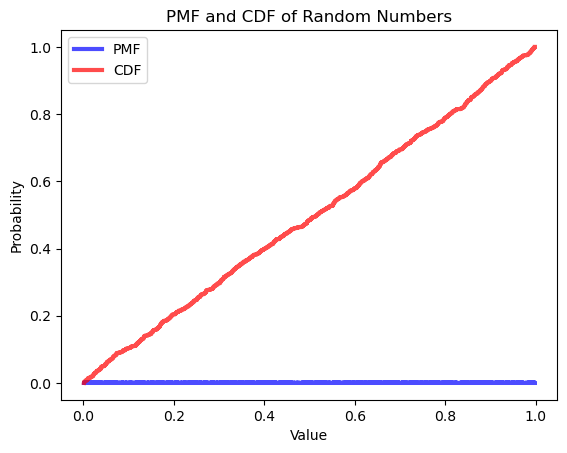

In [41]:
import random
import thinkstats2
import thinkplot

# Generate 1000 random numbers
random_numbers = [random.random() for _ in range(1000)]

# Compute PMF and CDF
pmf = thinkstats2.Pmf(random_numbers, label="PMF")
cdf = thinkstats2.Cdf(random_numbers, label="CDF")

# Plot PMF and CDF with different styles
thinkplot.PrePlot(2)
thinkplot.Pmf(pmf, color='blue')  # PMF in blue
thinkplot.Cdf(cdf, color='red')   # CDF in red
thinkplot.Config(title="PMF and CDF of Random Numbers", xlabel="Value", ylabel="Probability")


In [ ]:
# Yes, the distribution is uniform. 
# The PMF shows that the random numbers are evenly distributed across the range of 0 to 1.
# The CDF shows a diagonal line, which is a characteristic of uniform distribution.